In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

## Found out one additional revolution has been included in all reconstructions. Updating now

In [111]:
root = r"C:\Users\Bruker\Documents\Sandstone"
choose_formatter(False)

In [112]:
# Load .npy files

x1, x2 = 572, 828  # 672, 928
y1, y2 = 300, 556  # 384, 640
z1, z2 = 600, 856  # 384, 640

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "limestoneV3_17_55_12favg",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_0_1_fdk",
    "Rec_0_3_fdk",
    "Rec_0_5_fdk",
    "Rec_0_8_fdk",
    "Rec_0_13_fdk",
    "Rec_0_1_fdk_enhanced_700428728",
    "Rec_0_3_fdk_enhanced_700428728",
    "Rec_0_5_fdk_enhanced_700428728",
    "Rec_0_8_fdk_enhanced_700428728",
    "Rec_0_13_fdk_enhanced_700428728",

]
keys = [
    "gt",
    "17",
    "51",
    "85",
    "136",
    "221",
    "17_enhanced",
    "51_enhanced",
    "85_enhanced",
    "136_enhanced",
    "221_enhanced"
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
    else:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))

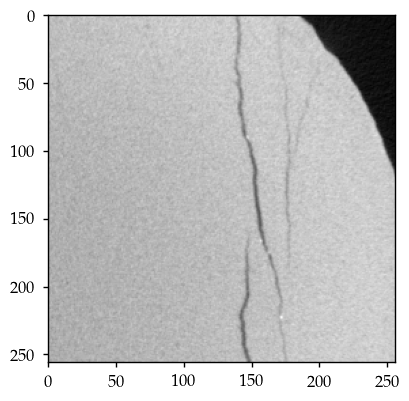

In [13]:
plt.imshow(crossections["gt"][0], cmap="gray")

In [113]:
def evaluate(x,y, normalise=False):

    # Normalises between 0 and 1
    if normalise:
        x = (x- np.min(x)) / (np.max(x)-np.min(x))
        y = (y- np.min(y)) / (np.max(y)-np.min(y))

    ssim = utils.calc_ssim(x, y)
    psnr = utils.calc_psnr(x, y)
    return ssim, psnr

In [ ]:
all_slices = []
all_labels = []


h=128
slgt = ( crossections["gt"][h] - np.min(crossections["gt"]) ) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = ( crossections["17"][h] - np.min(crossections["17"]) ) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout = (crossections["17_enhanced"][h] - np.min(crossections["17_enhanced"]) ) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth XY", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])

# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=False,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_17_projections",)

h = 100 

slgt = (crossections["gt"][:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (crossections["17"][:,h] - np.min(crossections["17"])) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout =( crossections["17_enhanced"][:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth YZ", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])


# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=False,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_crossection_17_projections",)


h = 160 

slgt = (crossections["gt"][:,:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (crossections["17"][:,:,h] - np.min(crossections["17"])) / ( np.max(crossections["17"]) - np.min(crossections["17"]) )
slout =( crossections["17_enhanced"][:,:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

mssin, _ = utils.calc_mssim(slgt, slin, k=11)
mssout, _ = utils.calc_mssim(slgt, slout, k=11)

print(ssin, ssout)
print(mssin, mssout)

all_slices.extend([slgt, slin, slout])
all_labels.extend(["Ground Truth XZ", f"FDK MSSIM: {mssin:.2f}", f"FDK-GAN MSSIM: {mssout:.2f}"])



# plot_slice_grid(
#     [slgt, slin, slout],
#     ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
#     bar=True,
#     folder ="Sandstone",
#     suptitle="17 Projections",
#     savefig=False,
#     savefile="Sandstone_crossection_17_projections",)


scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}

plot_slice_grid(
    all_slices,
    all_labels,
    bar=True,
    folder ="Sandstone",
    suptitle="17 Projections",
    savefig=True,
    savefile="Sandstone_crossection_17_projections",
    scalebar_kwargs=scale_kwargs,
    fs = (2,2)
)

In [ ]:
print(all_labels)
for x in range(0, len(all_labels)-2, 3):

    imgs = [all_slices[x+1], all_slices[x+2]]
    line_gt = all_slices[x]
    idxs= [128, 129, 10,255]
    plot_line_profile(imgs, ["FDK", "FDK-GAN"], line_gt, idxs= [69, 70, 10, 255], folder="Sandstone", title="Line Profile 17 Projections", savefig=True, savefile=f"Sandstone_line_profile_17_projections_{x}")

In [ ]:
_, psin = evaluate(slgt, slin, normalise=False)
_,psout = evaluate(slgt, slout, normalise=False)

all_diffs = []
all_diff_labels = []
for x in range(0, len(all_labels)-2, 3):

    _, psin = evaluate(all_slices[x], all_slices[x+1], normalise=False)

    all_diffs.append(all_slices[x+1] - all_slices[x])
    all_diff_labels.append(f"FDK: {psin:.2f}")

    _,psout = evaluate(all_slices[x], all_slices[x+2], normalise=False)

    all_diffs.append(all_slices[x+2] - all_slices[x])
    all_diff_labels.append(f"FDK-GAN: {psout:.2f}")


import matplotlib as mpl

plot_slice_grid(
    all_diffs,
    all_diff_labels,
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=True,
    savefile="Sandstone_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    ns=(3,2),
    fs =(2,1))



plot_slice_grid(
    [ -slgt+slin, -slgt+slout],
    [f"Input PSNR: {psin:.2f}", f"Output PSNR: {psout:.2f}"],
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=False,
    savefile="Sandstone_crossection_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    fs=(1,1))

In [ ]:
fq_keys = ["17", "51", "85", "136", "221"]

tot = 256
evsize = 256

X, Y, Z = np.meshgrid(np.arange(evsize), np.arange(evsize), np.arange(evsize))

radius = np.sqrt((X - evsize//2)**2 + (Y - evsize//2)**2 + (Z-evsize//2)**2).flatten()

uniques = np.unique(radius)




normalise = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

gt_3D = normalise(crossections["gt"])

ins_3D = {}
for k in fq_keys:
    ins_3D[k] = normalise(crossections[k])

outs_3D = {}
for k in fq_keys:
    outs_3D[k+"_enhanced"] = normalise(crossections[k+"_enhanced"])

import utils


print(tot//2)
outputs = [utils.FSC(
    gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    ins_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    sizes=(evsize,evsize,evsize)) for st in fq_keys ]

fq_keys_enhanced = ["17_enhanced", "51_enhanced", "85_enhanced", "136_enhanced", "221_enhanced"]
outputs_enhanced = [utils.FSC(gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2: tot//2+evsize//2], 
                        outs_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
                        sizes=(evsize, evsize, evsize)) for st in fq_keys_enhanced ]

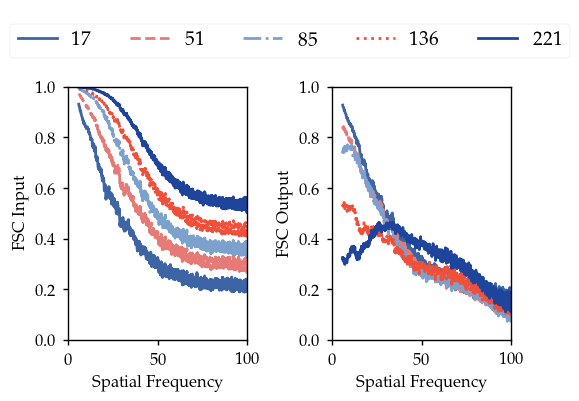

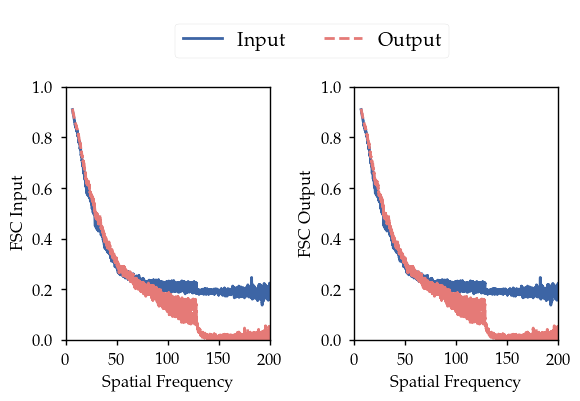

In [178]:
plot_fsc(outputs, outputs_enhanced, uniques, fq_keys, filter=30, xlim=(0,100), ylabel1="FSC Input", ylabel2="FSC Output", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement")

compare = [outputs[0], outputs_enhanced[0]]
plot_fsc( compare, compare, uniques, ["Input", "Output"], filter=40, xlim=(0,200), ylabel1="FSC Input", ylabel2="FSC Output", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement_compare")

In [114]:
identifiers_it = [
    "gt",
    "Rec_0_1_sirt",
]
keys_it = [
    "gt",
    "17",
    ]

it_crossections = {}

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers_it, keys_it)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
    else:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640

    load_name = f"{names[0]}_{identifiers_it[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}{'' if key=='gt' else '_it150' }.npy"
    load_path = os.path.join(root, load_name)
    it_crossections[key]= np.squeeze(np.load(load_path))

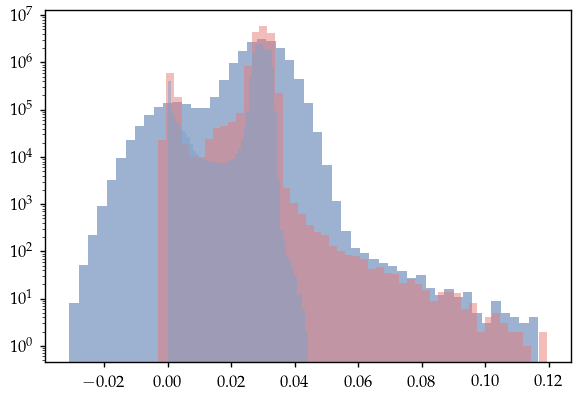

In [51]:
plt.hist(crossections["17"].flatten(), bins=50, alpha=0.5, label="GT",)
plt.hist(crossections["gt"].flatten(), bins=50, alpha=0.5, label="IT",)
plt.hist(it_crossections["17"].flatten(), bins=50, alpha=0.5, label="IT",)
plt.yscale("log")

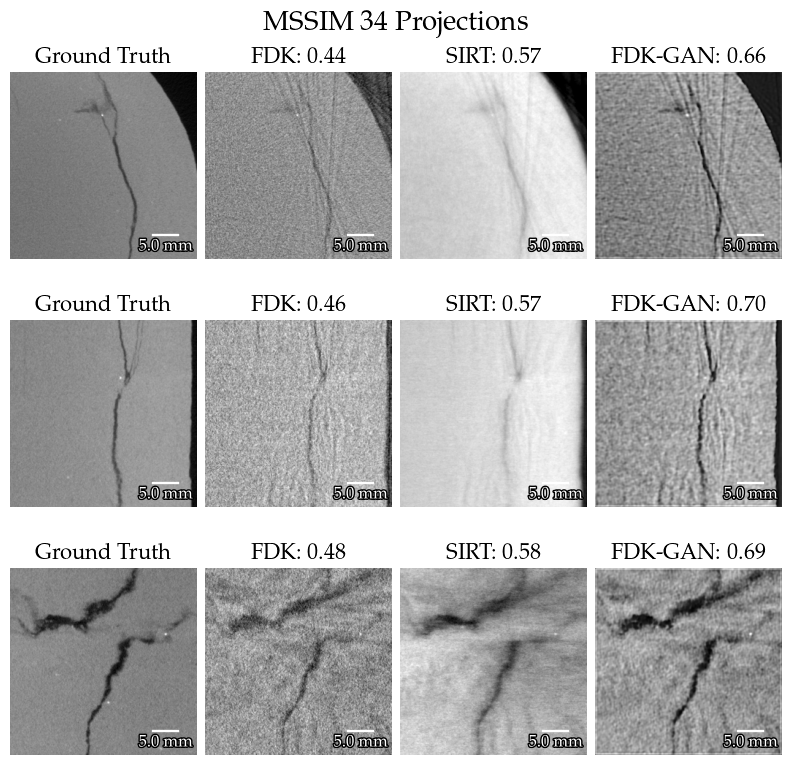

In [117]:
# Test of all in one.
import torchio as tio

all_slices = []
all_labels = []

slice_norm = lambda x, ref: (x - np.min(ref)) / (np.max(ref) - np.min(ref))
# slice_norm = lambda x, ref : (x-np.mean(ref[0:10, 0:10, -10:])) / (np.mean(ref[10:20, 10:20, 10:20]))
# slice_norm = lambda x, ref : (x-np.min(x)) / (np.max(x) - np.min(x))
# slice_norm = lambda x, ref : (x-np.mean(x)) / (np.std(x))

def slice_norm2(x, ref, n=1000):
    ref = ref.flatten()
    ref = np.sort(ref)
    print(np.median(ref), np.mean(ref))
    print(np.min(ref[:n]), np.max(ref[:n])
    )
    print(np.min(ref[-n:]), np.max(ref[-n:]))
    ref_min = np.mean(ref[:n])
    ref_max = np.mean(ref[-n:])
    return (x - ref_min) / (ref_max - ref_min)


#Current solution is to normalise SIRT and FDK with respect to the GT.
# This is not ideal, because GAN is already normalised. 
 
slice_indexer_x = lambda x, h: x[h]
slice_indexer_y = lambda x, h: x[:,h]
slice_indexer_z = lambda x, h: x[:,:,h]

slice_indexer = [slice_indexer_x, slice_indexer_y, slice_indexer_z]
hs = [128, 100, 160]
key = str(17) #Sandstone not re-reconstructed at this point. Satisfied with number of projections.

for i, si in enumerate(slice_indexer):

    slgt = slice_norm(si(crossections["gt"], hs[i]), crossections["gt"])
    slin = slice_norm(si(crossections[key], hs[i]), crossections[key])
    slit = slice_norm(si(it_crossections[key], hs[i]), it_crossections[key])
    slout = slice_norm(si(crossections[key+"_enhanced"], hs[i]), crossections[key+"_enhanced"])

    all_slices.extend([slgt, slin, slit, slout])
    
    mssin, _ = utils.calc_mssim(slgt, slin, k=11)
    mssit, _ = utils.calc_mssim(slgt, slit, k=11)
    mssout, _ = utils.calc_mssim(slgt, slout, k=11)    

    all_labels.extend([f"Ground Truth", f"FDK: {mssin:.2f}", f"SIRT: {mssit:.2f}", f"FDK-GAN: {mssout:.2f}"])

scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}
plot_slice_grid(
    all_slices,
    all_labels,
    suptitle=f"MSSIM {str(int(key)+17)} Projections",
    folder="Sandstone",
    savefile="Slice_grid_Sandstone_enhancement",
    savefig=True,
    bar = True,
    scalebar_kwargs=scale_kwargs,
    fs = (2,2),
    ns = (3,4)    
)



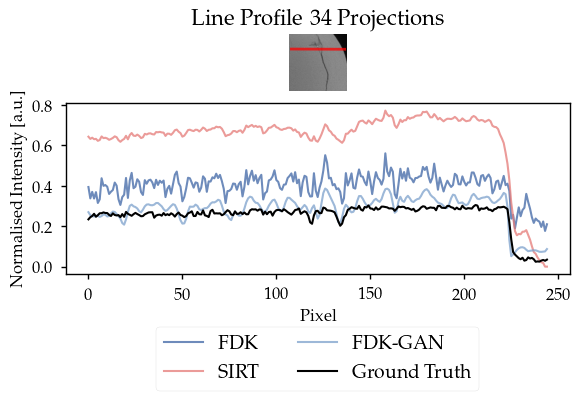

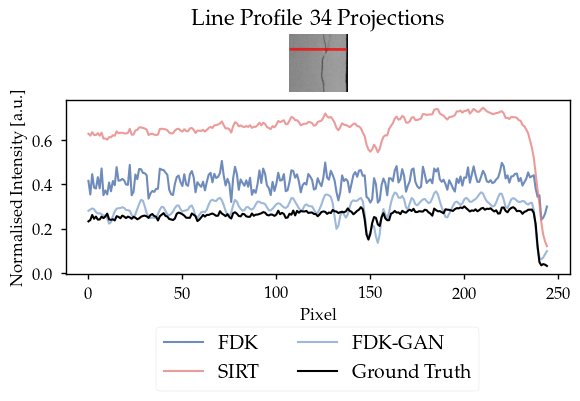

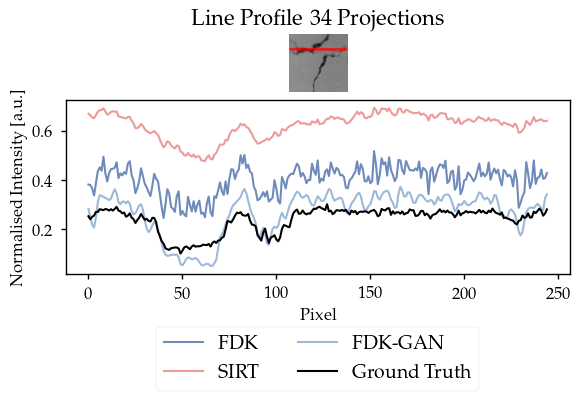

In [118]:
for x in range(0, len(all_labels)-3, 4):

    imgs = [all_slices[x+1], all_slices[x+2], all_slices[x+3]]
    line_gt = all_slices[x]
    plot_line_profile(imgs, ["FDK", "SIRT", "FDK-GAN"], line_gt, idxs= [69, 70, 10, 255], folder="Sandstone", title=f"Line Profile {str(int(key)+17)} Projections", savefig=True, savefile=f"Sandstone_line_profile_17_projections_{x}")



FDK: 10.83
-0.047706902 0.33927935
SIRT: 2.51
-0.050894212 0.5019599
FDK-GAN: 21.51
-0.17252657 0.1882604
FDK: 9.77
0.00058686733 0.32981414
SIRT: 1.33
-0.03690708 0.50565535
FDK-GAN: 20.43
-0.18337324 0.17622125
FDK: 9.61
-0.043413103 0.33018667
SIRT: 0.80
0.26301873 0.50543857
FDK-GAN: 19.09
-0.21628031 0.19169539


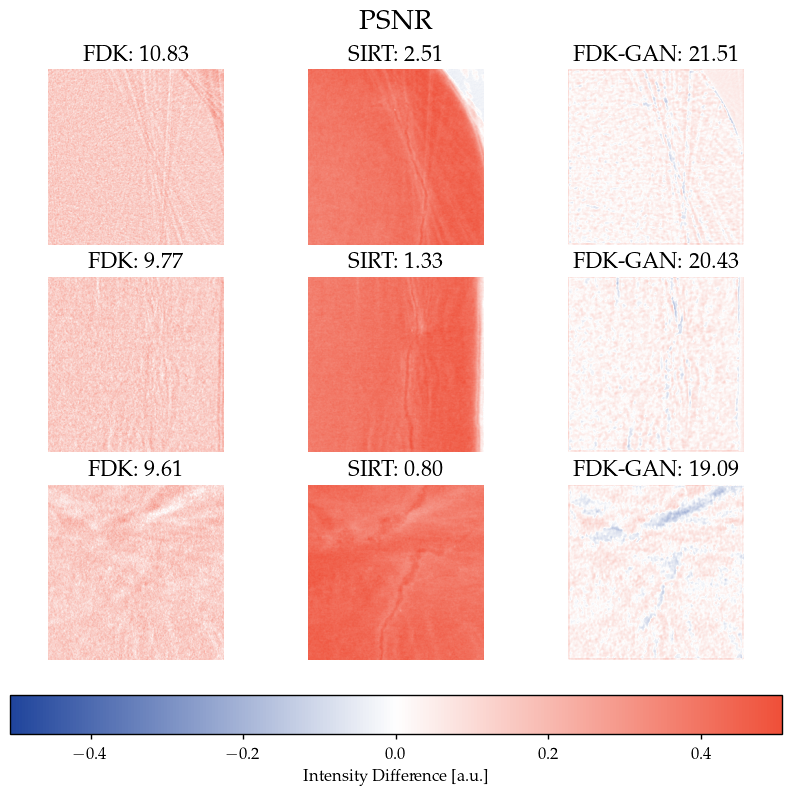

In [119]:
all_diffs = []
all_diff_labels = []
for x in range(0, len(all_labels)-3, 4):

    _, psin = evaluate(all_slices[x], all_slices[x+1], normalise=False)

    all_diffs.append(all_slices[x+1] - all_slices[x])
    all_diff_labels.append(f"FDK: {psin:.2f}")

    _, psit = evaluate(all_slices[x], all_slices[x+2], normalise=False)
    all_diffs.append(all_slices[x+2] - all_slices[x])
    all_diff_labels.append(f"SIRT: {psit:.2f}")

    _,psout = evaluate(all_slices[x], all_slices[x+3], normalise=False)

    all_diffs.append(all_slices[x+3] - all_slices[x])
    all_diff_labels.append(f"FDK-GAN: {psout:.2f}")


import matplotlib as mpl

plot_slice_grid(
    all_diffs,
    all_diff_labels,
    bar=False,
    folder ="Sandstone",
    suptitle="PSNR",
    savefig=False,
    savefile="Sandstone_difference_17_projections",
    cm=XRDCT_diverging_cmp,
    ns=(3,3),
    fs =(2,2))

-0.003006381 0.11939727
0.0 0.04418579
-0.03103297 0.11664943
0.0 1.0


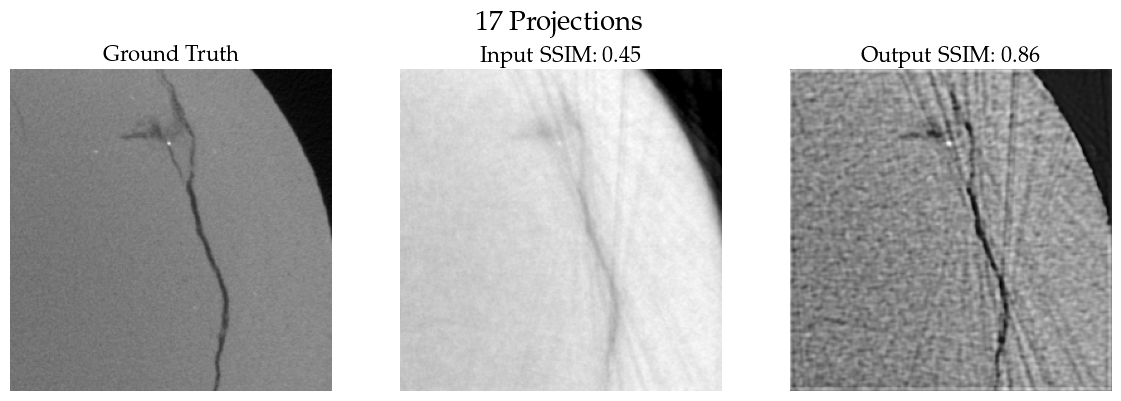

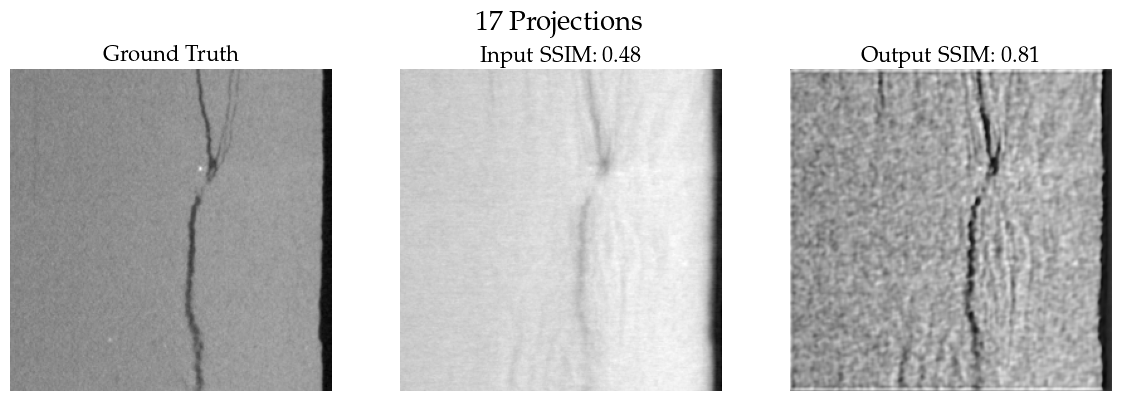

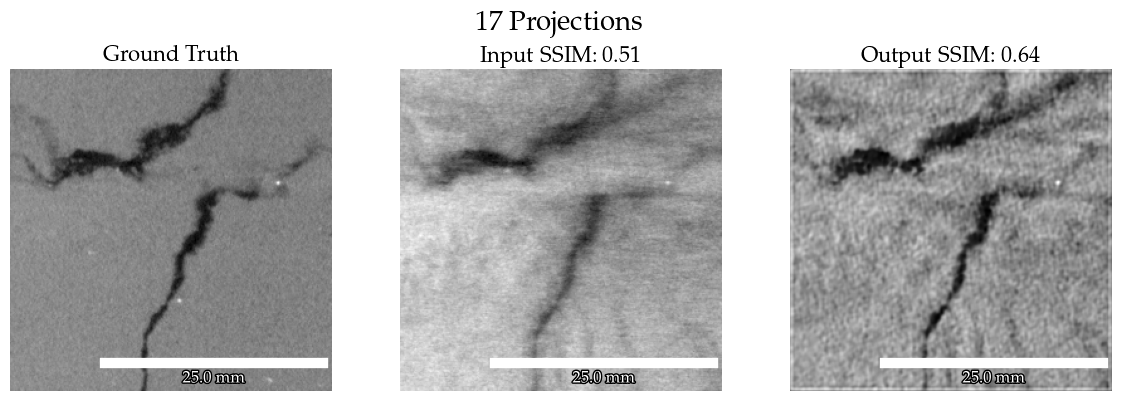

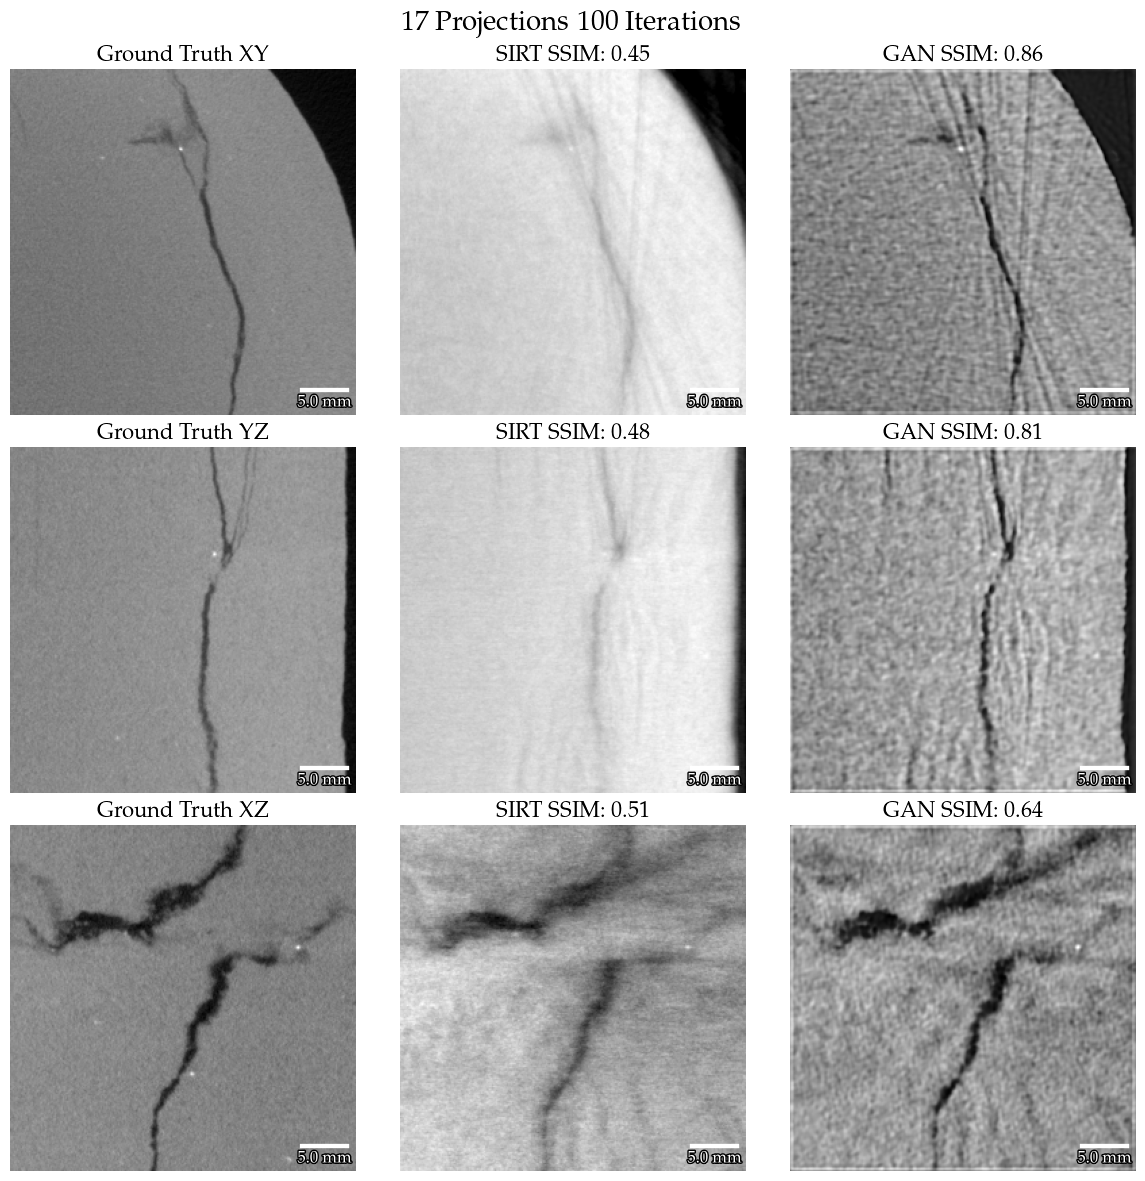

In [196]:
it_slices = []
it_labels = []


print(np.min(crossections["gt"]), np.max(crossections["gt"]))
print(np.min(it_crossections["17"]), np.max(it_crossections["17"]))
print(np.min(crossections["17"]), np.max(crossections["17"]))
print(np.min(crossections["17_enhanced"]), np.max(crossections["17_enhanced"]))



h=128
slgt = ( crossections["gt"][h] - np.min(crossections["gt"]) ) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = ( it_crossections["17"][h] - np.min(it_crossections["17"]) ) / ( np.max(it_crossections["17"]) - np.min(it_crossections["17"]) )
slout = (crossections["17_enhanced"][h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

it_slices.extend([slgt, slin, slout])
it_labels.extend(["Ground Truth XY", f"SIRT SSIM: {ssin:.2f}", f"GAN SSIM: {ssout:.2f}"])

plot_slice_grid(
    [slgt, slin, slout],
    ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
    bar=False,
    folder ="Sandstone",
    suptitle="17 Projections",
    savefig=False,
    savefile="Sandstone_17_projections_SIRT_vs_GAN",)

h = 100 

slgt = (crossections["gt"][:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (it_crossections["17"][:,h] - np.min(it_crossections["17"])) / ( np.max(it_crossections["17"]) - np.min(it_crossections["17"]) )
slout =( crossections["17_enhanced"][:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

it_slices.extend([slgt, slin, slout])
it_labels.extend(["Ground Truth YZ", f"SIRT SSIM: {ssin:.2f}", f"GAN SSIM: {ssout:.2f}"])


plot_slice_grid(
    [slgt, slin, slout],
    ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
    bar=False,
    folder ="Sandstone",
    suptitle="17 Projections",
    savefig=False,
    savefile="Sandstone_crossection_17_projections",)


h = 160 

slgt = (crossections["gt"][:,:,h] - np.min(crossections["gt"])) / ( np.max(crossections["gt"]) - np.min(crossections["gt"]) )
slin = (it_crossections["17"][:,:,h] - np.min(it_crossections["17"])) / ( np.max(it_crossections["17"]) - np.min(it_crossections["17"]) )
slout =( crossections["17_enhanced"][:,:,h] - np.min(crossections["17_enhanced"])) / ( np.max(crossections["17_enhanced"]) - np.min(crossections["17_enhanced"]) )

ssin, _ = evaluate(slgt, slin, normalise=False)
ssout,_ = evaluate(slgt, slout, normalise=False)

it_slices.extend([slgt, slin, slout])
it_labels.extend(["Ground Truth XZ", f"SIRT SSIM: {ssin:.2f}", f"GAN SSIM: {ssout:.2f}"])


plot_slice_grid(
    [slgt, slin, slout],
    ["Ground Truth", f"Input SSIM: {ssin:.2f}", f"Output SSIM: {ssout:.2f}"],
    bar=True,
    folder ="Sandstone",
    suptitle="17 Projections",
    savefig=False,
    savefile="Sandstone_crossection_17_projections",)


scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}

plot_slice_grid(
    it_slices,
    it_labels,
    bar=True,
    folder ="Sandstone",
    suptitle="17 Projections 100 Iterations",
    savefig=False,
    savefile="Sandstone_crossection_17_projections_SIRT100_vs_GAN",
    scalebar_kwargs=scale_kwargs,
)

#Shitty SIRT. Try 150 iterations (Absolute max should be 200)

Ground Truth XY


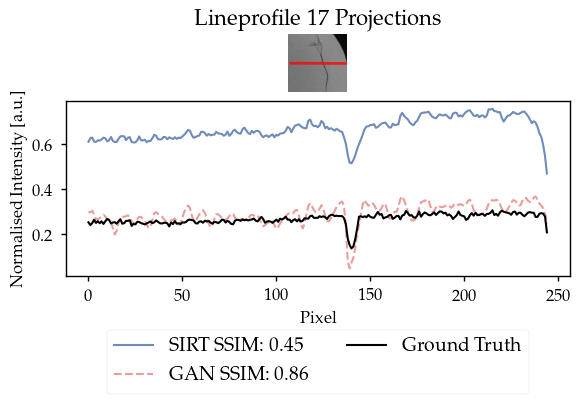

Ground Truth YZ


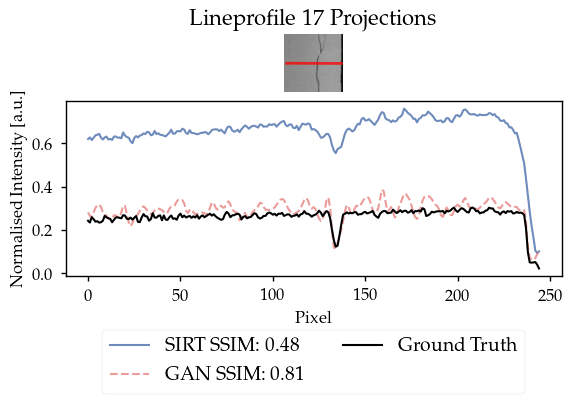

Ground Truth XZ


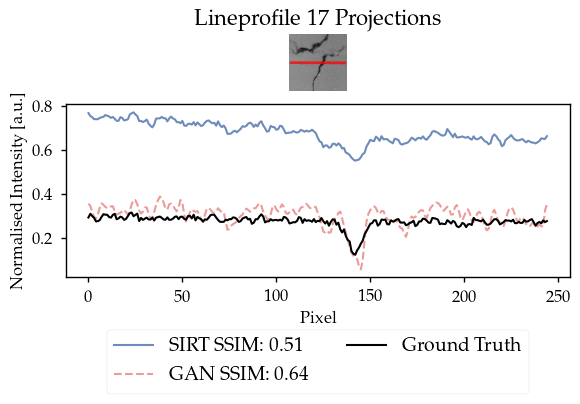

In [197]:
for x in range(0, len(all_labels)-2, 3):

    print(it_labels[x])
    imgs = [it_slices[x+1], it_slices[x+2]]
    line_gt = it_slices[x]
    labels = [it_labels[x+1], it_labels[x+2]]

    plot_line_profile(imgs, labels, line_gt, idxs= [128, 129, 10,255], folder="Sandstone", title="Lineprofile 17 Projections", savefig=False, savefile="Sandstone_line_profile_17_projections_SIRT_GAN")

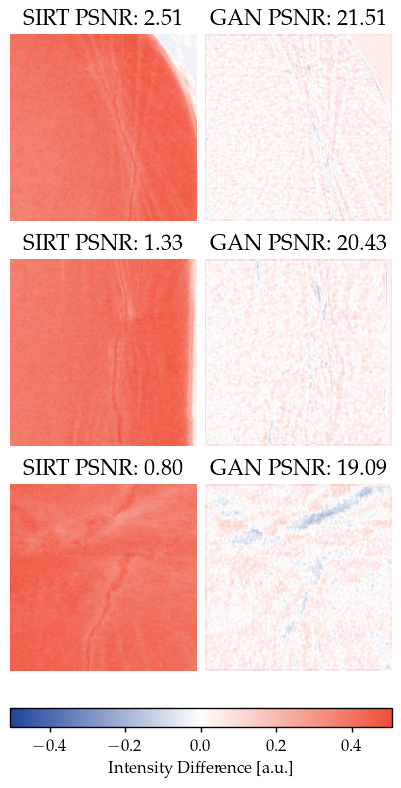

In [198]:
_, psin = evaluate(slgt, slin, normalise=False)
_,psout = evaluate(slgt, slout, normalise=False)

it_diffs = []
it_diff_labels = []
for x in range(0, len(it_labels)-2, 3):

    _, psin = evaluate(it_slices[x], it_slices[x+1], normalise=False)

    it_diffs.append(it_slices[x+1] - it_slices[x])
    it_diff_labels.append(f"SIRT PSNR: {psin:.2f}")

    _,psout = evaluate(it_slices[x], it_slices[x+2], normalise=False)

    it_diffs.append(it_slices[x+2] - it_slices[x])
    it_diff_labels.append(f"GAN PSNR: {psout:.2f}")



plot_slice_grid(
    it_diffs,
    it_diff_labels,
    bar=False,
    folder ="Sandstone",
    suptitle=None,
    savefig=False,
    savefile="Sandstone_difference_17_projections_SIRT_vs_GAN",
    cm=XRDCT_diverging_cmp,
    ns=(3,2),
    fs =(2,1))

In [199]:
fq_keys = ["17", "17_enhanced"]

tot = 256
evsize = 256

X, Y, Z = np.meshgrid(np.arange(evsize), np.arange(evsize), np.arange(evsize))

radius = np.sqrt((X - evsize//2)**2 + (Y - evsize//2)**2 + (Z-evsize//2)**2).flatten()

uniques = np.unique(radius)




normalise = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

gt_3D = normalise(crossections["gt"])

ins_3D = {}
for k in fq_keys:
    ins_3D[k] = normalise(crossections[k])

outs_3D = {}
# for k in fq_keys:
outs_3D[fq_keys[0]] = normalise(it_crossections[fq_keys[0]])
outs_3D[fq_keys[1]] = normalise(crossections[fq_keys[1]])

import utils


print(tot//2)
outputs = [utils.FSC(
    gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    ins_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
    sizes=(evsize,evsize,evsize)) for st in fq_keys ]

outputs_enhanced = [utils.FSC(gt_3D[tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2: tot//2+evsize//2], 
                        outs_3D[st][tot//2-evsize//2: tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2, tot//2-evsize//2:tot//2+evsize//2], 
                        sizes=(evsize, evsize, evsize)) for st in fq_keys ]

128
(33743,)


100%|██████████| 33743/33743 [00:05<00:00, 6642.23it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 7279.61it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 6766.74it/s] 


(33743,)


100%|██████████| 33743/33743 [00:04<00:00, 7361.72it/s] 


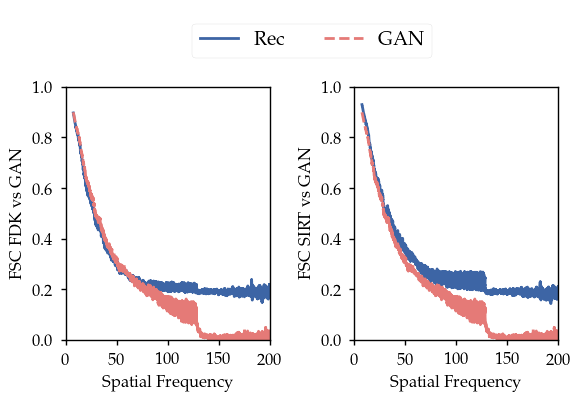

In [207]:
plot_fsc(outputs, outputs_enhanced, uniques, ["Rec", "GAN"], filter=50, xlim=(0,200), ylabel1="FSC FDK vs GAN", ylabel2="FSC SIRT vs GAN", save=False, folder="Sandstone", savefile="FSC_Sandstone_enhancement")